In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('irrigationwaterpump1000.csv')

In [3]:
dataset

,Crop,Moisture1,Moisture2,Temperature,Humidity,Level,label
0,3,1,7,31,60,3,5
1,5,7,2,36,57,2,5
2,5,15,3,38,56,2,3
3,1,4,8,36,59,2,5
4,3,7,14,33,68,4,1
...,...,...,...,...,...,...,...
1195,5,14,12,28,49,1,6
1196,2,15,13,25,43,4,6
1197,3,12,14,27,46,3,6
1198,5,12,13,22,41,2,6


Text(0.5, 1.0, 'Count of each Target Class')

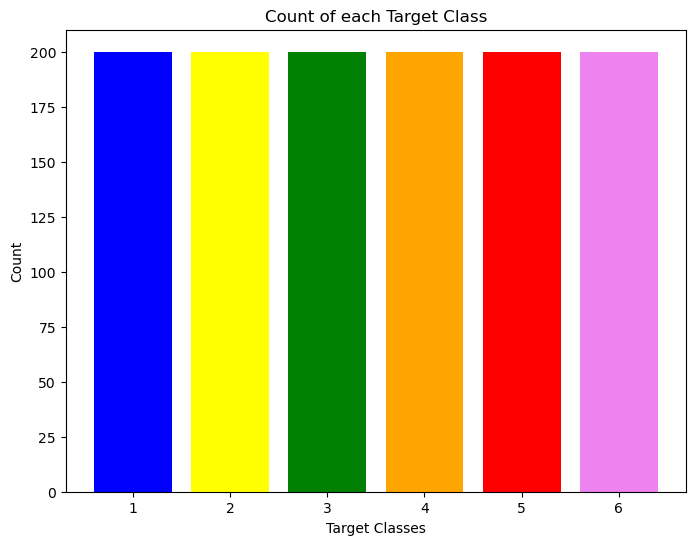

In [4]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['label'].unique(), dataset['label'].value_counts(), color = ['red', 'green', 'blue', 'yellow', 'orange', 'violet'])
plt.xticks([1,2,3,4,5,6])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [5]:
y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
gnb = GaussianNB()

In [7]:
gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
import urllib
import requests
import re

In [9]:
link = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V0"
f = requests.get(link)
f1=f.text
f1="".join(c for c in f1 if c.isalnum())
link2 = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V1"
f = requests.get(link2)
f2=f.text
f2="".join(c for c in f2 if c.isalnum())
link3 = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V3"
f = requests.get(link3)
f3=f.text
f3="".join(c for c in f3 if c.isalnum())

In [10]:
print(f1)
print(f2)
print(f3)
f4=2
def spliter(line):
    dim = ['M2','H']
    remove = ['M1','T']
    for word in remove:
        line = line.replace(word,"")   
    for word in dim:
        word = ""+word+""
        line = line.replace(word," ")
    return line.split(" ")
result1 = spliter(f1)
result2 = spliter(f2)
result3 = spliter(f3)

0
M10M21
T38H56


In [11]:
print('Crop : ',f1)
print('Moisture 1 : ',result2[0])
print('Moisture 2 : ',result2[1])
print('Temperature : ',result3[0])
print('Humidity : ',result3[1])

Crop :  0
Moisture 1 :  0
Moisture 2 :  1
Temperature :  38
Humidity :  56


In [12]:
sensordata = [[float(f1),float(result2[0]),float(result2[1]),float(result3[0]),float(result3[1]),float(f4)]]
#sensordata = [[float(106),float(87),float(10),float(10.112725),float(76.101282),float(2)]]
#print(sensordata)

In [13]:
y_pred = gnb.predict(sensordata)

In [14]:
print(y_pred)

[5]


In [15]:
if y_pred==1:
    print('Valve 1 Pump ON')
    res1='1'
if y_pred==2:
    print('Valve 1 Pump OFF')
    res1='2'
if y_pred==3:
    print('Valve 2 Pump ON')
    res1='3'
if y_pred==4:
    print('Valve 2 Pump OFF')
    res1='4'
if y_pred==5:
    print('Valve 1 & Valve 2 Pump ON')
    res1='5'
if y_pred==6:
    print('Valve 1 & Valve 2 Pump OFF')
    res1='6'

Valve 1 & Valve 2 Pump ON


In [16]:
link5 = "https://blynk.cloud/external/api/update?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V4="+res1
f = requests.get(link5)
f5=f.text
f5="".join(c for c in f5 if c.isalnum())

In [ ]:
import time
count=0
while True:
    time.sleep(20) # waits 20 seconds
    link = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V0"
    f = requests.get(link)
    f1=f.text
    f1="".join(c for c in f1 if c.isalnum())
    link2 = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V1"
    f = requests.get(link2)
    f2=f.text
    f2="".join(c for c in f2 if c.isalnum())
    link3 = "https://blynk.cloud/external/api/get?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V3"
    f = requests.get(link3)
    f3=f.text
    f3="".join(c for c in f3 if c.isalnum())
    result1 = spliter(f1)
    result2 = spliter(f2)
    result3 = spliter(f3)
    sensordata = [[float(f1),float(result2[0]),float(result2[1]),float(result3[0]),float(result3[1]),float(f4)]]
    y_pred = gnb.predict(sensordata)
    if y_pred==1:
        print('Valve 1 Pump ON')
        res1='1'
    if y_pred==2:
        print('Valve 1 Pump OFF')
        res1='2'
    if y_pred==3:
        print('Valve 2 Pump ON')
        res1='3'
    if y_pred==4:
        print('Valve 2 Pump OFF')
        res1='4'
    if y_pred==5:
        print('Valve 1 & Valve 2 Pump ON')
        res1='5'
    if y_pred==6:
        print('Valve 1 & Valve 2 Pump OFF')
        res1='6'
    link5 = "https://blynk.cloud/external/api/update?token=oexxsVM_hFfU-IK-h1q-inkWh-FUZMsD&V4="+res1
    f = requests.get(link5)
    f5=f.text
    f5="".join(c for c in f5 if c.isalnum())
    count = count+1
    if count>1000: # break on a specific statment
        break

Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Valve 2 Pump ON
Valve 1 & Va